In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/sv-env/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.1' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [8]:
# FiGS examples (scene_name, course_name)
flights = [
    ('mid_gate','robustness_track'),
    ]

roster = [
    "Viper",        # HP-Net (non-visual policy)
    "Maverick",     # SV-Net
    "Iceman",       # SV-Net with Direct History (no latent encoding)
    "Hollywood",    # SV-Net with no Pre-Training
    "Cougar"        # SV-Net with no RMA
    ]

drone = "carl"
method = "beta"
cohort = "robustness"

Nep_par = 50
Nep_com = 200

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,method,flights)

ps.plot_samples(cohort)

In [5]:
# Generate Observations for Datya Size Variation
og.generate_observation_data(cohort,roster)

------------------------------------------------------------------------------------------
Pilot Name  : Viper
Augmentation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            :                        +/-
            : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Subsample   : 1 in 1
Model ------------------------------------------------------------------------------------
Name        : HPNet
Components  : HistoryEncoder,CommandHP
------------------------------------------------------------------------------------------
Data Counts ------------------------------------------------------------------------------
Extracted 180000 observations from 1 course(s).
------------------------------------------------------------------------------------------
Pilot Name  : Maverick
Augmentation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            :                        +/-
            : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Subsample   : 1 in 1
Model -----

Training Student:  Viper
Training new network.


  0%|          | 0/50 [00:00<?, ?it/s]

Training Student:  Maverick
Training new network.


  0%|          | 0/50 [00:00<?, ?it/s]

Training Student:  Iceman
Training new network.


  0%|          | 0/50 [00:00<?, ?it/s]

--------------------------------------------------------------------------
Hollywood has no model for Parameter
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Cougar has no model for Parameter
--------------------------------------------------------------------------
Network Type:  Parameter
Cohort:   robustness
-----------------------------------------------------
Student: Viper
Epochs : 50
Samples: 178000
t_train: 0.0 hour(s), 16.0 minute(s), 58.3 second(s)
-----------------------------------------------------
Student: Maverick
Epochs : 50
Samples: 178000
t_train: 1.0 hour(s), 25.0 minute(s), 59.9 second(s)
-----------------------------------------------------
Student: Iceman
Epochs : 50
Samples: 178000
t_train: 1.0 hour(s), 25.0 minute(s), 43.2 second(s)
-----------------------------------------------------
No Parameter network found for Hollywood
----------------------------------

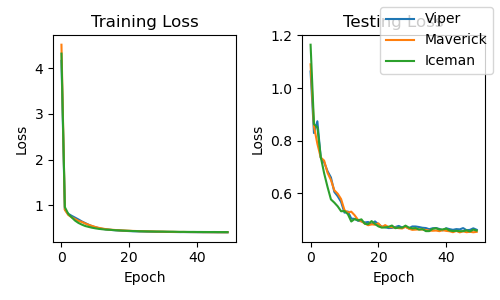

In [6]:
# Train the History Network
tp.train_roster(cohort,roster,"Parameter",Nep_par,lim_sv=10)

# Review Losses
pl.plot_losses(cohort,roster,"Parameter")

In [7]:
# Train the Command Network
tp.train_roster(cohort,roster,"Commander",Nep_com,lim_sv=10)

# Review Losses
pl.plot_losses(cohort,roster,"Commander")

Training Student:  Hollywood
Re-training existing network.
Previous Epochs:  30 [30]


  0%|          | 0/170 [00:00<?, ?it/s]

In [ ]:
# Simulate in FiGS
for scene,course in flights:
    df.simulate_roster(cohort,method,scene,course,roster)

# Plot the results
for _,course in flights:
    pl.review_simulations(cohort,course,roster,plot_show=True)